<a href="https://colab.research.google.com/github/StudentM04/ML_SolenovaM/blob/main/MachineLearningfin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Этот датасет содержит список из 10 тысяч самых популярных фильмов TMDb и их детали - мельчайшие подробности, предоставленные веб-сайтом TMDb, такие как жанр, язык, рейтинги, бюджет и т.д.

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import ast
import pickle
%pylab inline --no-import-all
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


Загрузим файл TMDB.csv:

In [ ]:
from google.colab import files
uploaded = files.upload()

for file_name, file_content in uploaded.items():
    with open(file_name, 'wb') as f:
        f.write(file_content)
        print('CSV файл', file_name, 'загружен успешно.')

Saving TMDB.csv to TMDB.csv
CSV файл TMDB.csv загружен успешно.


Посмотрим основную информацию по датасету:

In [ ]:
movies_df = pd.read_csv("TMDB.csv")
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   movie_id              10000 non-null  int64  
 2   title                 10000 non-null  object 
 3   overview              9915 non-null   object 
 4   keywords              10000 non-null  object 
 5   genres                10000 non-null  object 
 6   release_date          9977 non-null   object 
 7   original_language     10000 non-null  object 
 8   original_title        10000 non-null  object 
 9   production_companies  10000 non-null  object 
 10  revenue               10000 non-null  int64  
 11  status                10000 non-null  object 
 12  tagline               7320 non-null   object 
 13  spoken_languages      10000 non-null  object 
 14  runtime               10000 non-null  int64  
 15  budget              

Выведем первые 5 объектов:

In [ ]:
movies_df.head(5)

,Unnamed: 0,movie_id,title,overview,keywords,genres,release_date,original_language,original_title,production_companies,...,spoken_languages,runtime,budget,vote_count,vote_average,popularity,adult_tf,poster_path,cast,crew
0,1,76600,Avatar: The Way of Water,Set more than a decade after the events of the...,"[{'id': 697, 'name': 'loss of loved one'}, {'i...","[{'id': 878, 'name': 'Science Fiction'}, {'id'...",2022-12-14,en,Avatar: The Way of Water,"[{'id': 574, 'logo_path': '/iB6GjNVHs5hOqcEYt2...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",192,460000000,3655,7.711,4549.057,False,/t6HIqrRAclMCA60NsSmeqe9RmNV.jpg,"[{'adult': False, 'gender': 2, 'id': 65731, 'k...","[{'adult': False, 'gender': 2, 'id': 1721, 'kn..."
1,2,661374,Glass Onion: A Knives Out Mystery,World-famous detective Benoit Blanc heads to G...,"[{'id': 703, 'name': 'detective'}, {'id': 1200...","[{'id': 9648, 'name': 'Mystery'}, {'id': 53, '...",2022-11-23,en,Glass Onion: A Knives Out Mystery,"[{'id': 37871, 'logo_path': '/lZW4kQSSLFldUpjj...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",140,40000000,2204,7.083,3609.063,False,/vDGr1YdrlfbU9wxTOdpf3zChmv9.jpg,"[{'adult': False, 'gender': 2, 'id': 8784, 'kn...","[{'adult': False, 'gender': 2, 'id': 1226, 'kn..."
2,3,899112,Violent Night,When a team of mercenaries breaks into a wealt...,"[{'id': 65, 'name': 'holiday'}, {'id': 1991, '...","[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",2022-11-30,en,Violent Night,"[{'id': 33, 'logo_path': '/8lvHyhjr8oUKOOy2dKX...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",112,20000000,805,7.742,3283.632,False,/nhXjUvOvq7rJlvJFCrZMUUJ9Mn0.jpg,"[{'adult': False, 'gender': 2, 'id': 35029, 'k...","[{'adult': False, 'gender': 2, 'id': 6114, 'kn..."
3,4,411,"The Chronicles of Narnia: The Lion, the Witch ...","Siblings Lucy, Edmund, Susan and Peter step th...","[{'id': 83, 'name': 'saving the world'}, {'id'...","[{'id': 12, 'name': 'Adventure'}, {'id': 10751...",2005-12-07,en,"The Chronicles of Narnia: The Lion, the Witch ...","[{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...",...,"[{'english_name': 'English', 'iso_639_1': 'en'...",143,180000000,9108,7.108,3057.713,False,/iREd0rNCjYdf5Ar0vfaW32yrkm.jpg,"[{'adult': False, 'gender': 2, 'id': 5527, 'kn...","[{'adult': False, 'gender': 2, 'id': 1095, 'kn..."
4,5,436270,Black Adam,"Nearly 5,000 years after he was bestowed with ...","[{'id': 952, 'name': 'lightning'}, {'id': 2095...","[{'id': 28, 'name': 'Action'}, {'id': 14, 'nam...",2022-10-19,en,Black Adam,"[{'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTv...",...,"[{'english_name': 'Arabic', 'iso_639_1': 'ar',...",125,200000000,3544,7.216,2590.202,False,/pFlaoHTZeyNkG83vxsAJiGzfSsa.jpg,"[{'adult': False, 'gender': 2, 'id': 18918, 'k...","[{'adult': False, 'gender': 2, 'id': 3687, 'kn..."


In [ ]:

movies_df.nunique()


Unnamed: 0              10000
movie_id                 8961
title                    8675
overview                 8883
keywords                 7509
genres                   2159
release_date             5524
original_language          48
original_title           8727
production_companies     7020
revenue                  4867
status                      4
tagline                  6552
spoken_languages          929
runtime                   214
budget                    648
vote_count               3293
vote_average             2957
popularity               7476
adult_tf                    1
poster_path              8939
cast                     8897
crew                     8899
dtype: int64

Количество объектов и признаков в датасете:

In [ ]:
movies_df.shape


(10000, 23)

In [ ]:
movies_df.columns

Index(['Unnamed: 0', 'movie_id', 'title', 'overview', 'keywords', 'genres',
       'release_date', 'original_language', 'original_title',
       'production_companies', 'revenue', 'status', 'tagline',
       'spoken_languages', 'runtime', 'budget', 'vote_count', 'vote_average',
       'popularity', 'adult_tf', 'poster_path', 'cast', 'crew'],
      dtype='object')

Выберем категориальные признаки:

In [ ]:
movies_df['title'] = movies_df['title'].astype('category')

In [ ]:
movies_df['overview'] = movies_df['overview'].astype('category')

In [ ]:
movies_df['genres'] = movies_df['genres'].astype('category')

In [ ]:
movies_df['keywords'] = movies_df['keywords'].astype('category')

In [ ]:
movies_df['release_date'] = movies_df['release_date'].astype('category')

In [ ]:
movies_df['original_language'] = movies_df['original_language'].astype('category')

In [ ]:
movies_df['production_companies'] = movies_df['production_companies'].astype('category')

In [ ]:
movies_df['status'] = movies_df['status'].astype('category')

In [ ]:
movies_df['tagline'] = movies_df['tagline'].astype('category')

In [ ]:
movies_df['spoken_languages'] = movies_df['spoken_languages'].astype('category')

In [ ]:
movies_df['adult_tf'] = movies_df['adult_tf'].astype('category')

In [ ]:
movies_df['poster_path'] = movies_df['poster_path'].astype('category')

In [ ]:
movies_df['cast'] = movies_df['cast'].astype('category')

In [ ]:
movies_df['crew'] = movies_df['crew'].astype('category')

In [ ]:
movies_df['original_title'] = movies_df['original_title'].astype('category')

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Unnamed: 0            10000 non-null  int64   
 1   movie_id              10000 non-null  int64   
 2   title                 10000 non-null  category
 3   overview              9915 non-null   category
 4   keywords              10000 non-null  category
 5   genres                10000 non-null  category
 6   release_date          9977 non-null   category
 7   original_language     10000 non-null  category
 8   original_title        10000 non-null  category
 9   production_companies  10000 non-null  category
 10  revenue               10000 non-null  int64   
 11  status                10000 non-null  category
 12  tagline               7320 non-null   category
 13  spoken_languages      10000 non-null  category
 14  runtime               10000 non-null  int64   
 15  bud

In [ ]:
num_cols = [c for c in movies_df.columns if movies_df[c].dtype =='int64' or movies_df[c].dtype == 'float64']
print(f'Список числовых колонок:\n{num_cols}')

Список числовых колонок:
['Unnamed: 0', 'movie_id', 'revenue', 'runtime', 'budget', 'vote_count', 'vote_average', 'popularity']


In [ ]:
cat_cols = [cname for cname in movies_df.columns if movies_df[cname].dtype =='category']
print(f'Список категориальных колонок:\n{cat_cols}')

Список категориальных колонок:
['title', 'overview', 'keywords', 'genres', 'release_date', 'original_language', 'original_title', 'production_companies', 'status', 'tagline', 'spoken_languages', 'adult_tf', 'poster_path', 'cast', 'crew']


Проверим, есть ли пропущенные значения в датасете:

In [ ]:
movies_df.isnull().sum()

Unnamed: 0                 0
movie_id                   0
title                      0
overview                  85
keywords                   0
genres                     0
release_date              23
original_language          0
original_title             0
production_companies       0
revenue                    0
status                     0
tagline                 2680
spoken_languages           0
runtime                    0
budget                     0
vote_count                 0
vote_average               0
popularity                 0
adult_tf                   0
poster_path               30
cast                       0
crew                       0
dtype: int64

Попробуем от них избавиться. Для этого заполним пропущенные значения наиболее часто встречающимися значениями(т.к. это категориальные признаки, мы не можем заменить их медианой или средним значением).

In [ ]:
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
movies_df['tagline']=pd.DataFrame(imputer.fit_transform(movies_df[['tagline']]))
movies_df['overview']=pd.DataFrame(imputer.fit_transform(movies_df[['overview']]))
movies_df['release_date']=pd.DataFrame(imputer.fit_transform(movies_df[['release_date']]))
movies_df['poster_path']=pd.DataFrame(imputer.fit_transform(movies_df[['poster_path']]))


In [ ]:
movies_df.isnull().sum()


Unnamed: 0              0
movie_id                0
title                   0
overview                0
keywords                0
genres                  0
release_date            0
original_language       0
original_title          0
production_companies    0
revenue                 0
status                  0
tagline                 0
spoken_languages        0
runtime                 0
budget                  0
vote_count              0
vote_average            0
popularity              0
adult_tf                0
poster_path             0
cast                    0
crew                    0
dtype: int64

Посмотрим диаграммырассеивания для количественных признаков:

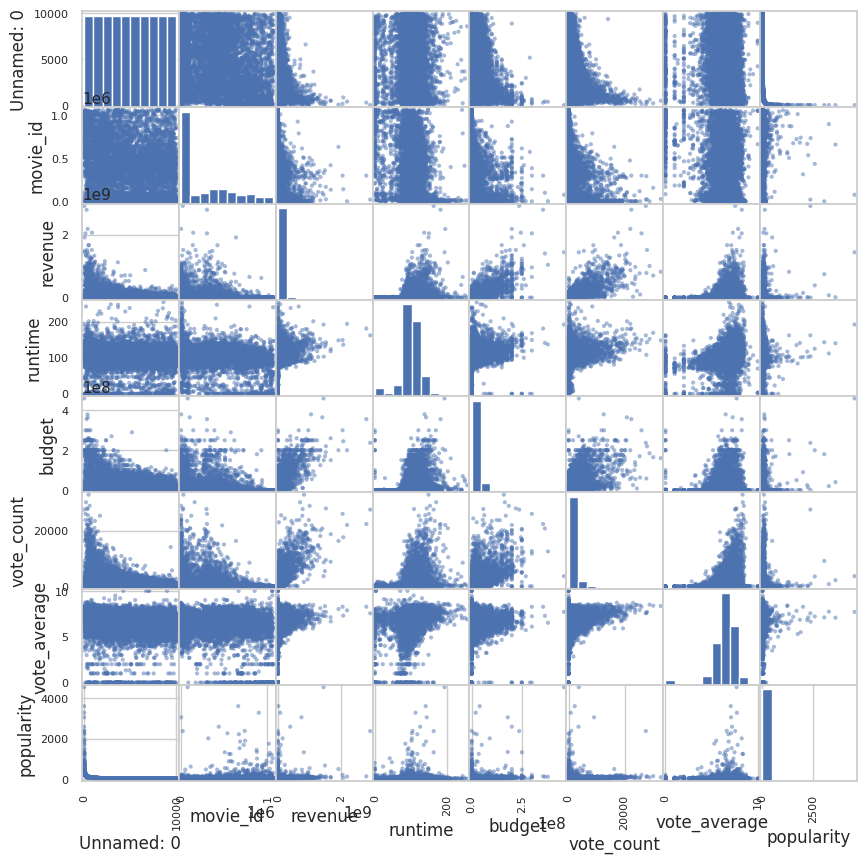

In [ ]:
pd.plotting.scatter_matrix(movies_df, figsize = (10, 10))
pass

Вычислим матрицу корреляции для количественных признаков и посмотрим ее визуальный образ:

In [ ]:
corr_mat = movies_df.corr(numeric_only = True)
corr_mat

,Unnamed: 0,movie_id,revenue,runtime,budget,vote_count,vote_average,popularity
Unnamed: 0,1.000000,-0.196727,-0.324590,-0.030327,-0.297633,-0.383727,-0.064017,-0.274795
movie_id,-0.196727,1.000000,-0.189912,-0.269102,-0.231719,-0.231645,-0.237193,0.136007
revenue,-0.324590,-0.189912,1.000000,0.258288,0.741479,0.762041,0.146553,0.170579
runtime,-0.030327,-0.269102,0.258288,1.000000,0.275749,0.292062,0.409349,0.036408
budget,-0.297633,-0.231719,0.741479,0.275749,1.000000,0.601050,0.068120,0.149844
vote_count,-0.383727,-0.231645,0.762041,0.292062,0.601050,1.000000,0.253405,0.093362
vote_average,-0.064017,-0.237193,0.146553,0.409349,0.068120,0.253405,1.000000,0.049747
popularity,-0.274795,0.136007,0.170579,0.036408,0.149844,0.093362,0.049747,1.000000


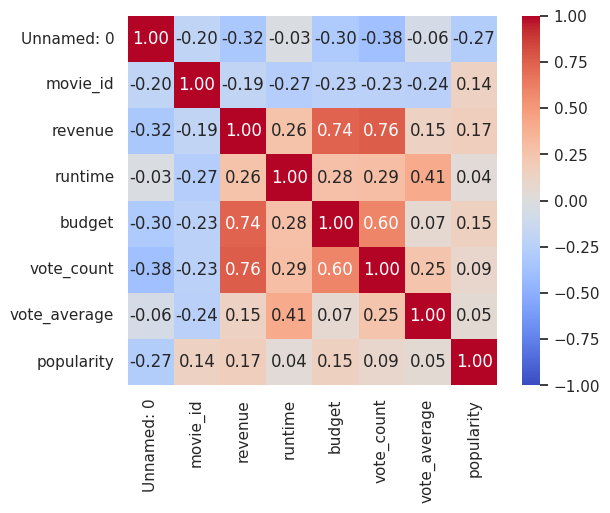

In [ ]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Можно заметить, что достаточно много признаков друг с другом не связаны. Например, "popularity" и "runtime", или "vote_average" и "popularity".

С помощью метода приведенного ниже для каждого количественного(числового) признака найдем средние значения, стандартное отклонение, минимальное и макимальное значения, медиану и значения квартилей. Затем сделаем то ж самое для категориальных.



In [ ]:
movies_df[num_cols].describe()

,Unnamed: 0,movie_id,revenue,runtime,budget,vote_count,vote_average,popularity
count,10000.00000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.826079e+05,5.946783e+07,99.963100,1.971521e+07,1494.903400,6.347690,37.632133
std,2886.89568,3.169677e+05,1.521151e+08,28.144615,3.809948e+07,2782.132296,1.371742,118.142436
min,1.00000,2.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,9.976000
25%,2500.75000,1.141575e+04,0.000000e+00,90.000000,0.000000e+00,138.750000,5.913000,15.378750
50%,5000.50000,1.058120e+05,2.148482e+06,100.000000,1.500000e+06,510.000000,6.551000,19.300000
75%,7500.25000,5.118175e+05,5.000000e+07,114.000000,2.300000e+07,1500.250000,7.145000,31.200500
max,10000.00000,1.067330e+06,2.920357e+09,254.000000,4.600000e+08,32919.000000,10.000000,4549.057000


In [ ]:
movies_df[cat_cols].describe(include=['category'])

,title,keywords,genres,original_language,original_title,production_companies,status,spoken_languages,adult_tf,cast,crew
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,8675,7509,2159,48,8727,7020,4,929,1,8897,8899
top,Porno,[],"[{'id': 18, 'name': 'Drama'}]",en,Oscar et la dame rose,[],Released,"[{'english_name': 'English', 'iso_639_1': 'en'...",False,[],[]
freq,7,1145,523,7379,7,501,9924,5347,10000,76,73


Бинарных признаков нет.

Обработаем категориальные признаки, переведя их в численные значения(метод бинеаризации).

In [ ]:
movies_nonbinary = pd.get_dummies(movies_df[['title','keywords','genres','original_language','original_title','production_companies','status','spoken_languages','adult_tf','cast','crew']])
print(movies_nonbinary.columns)

Index(['title_"Sr."', 'title_#Alive', 'title_#FBF',
       'title_#PartiuFama: Cancelado no Amor', 'title_#Unknown',
       'title_#realityhigh', 'title_'71', 'title_(500) Days of Summer',
       'title_*batteries not included', 'title_...Watch Out, We're Mad',
       ...
       'crew_[{'adult': True, 'gender': 2, 'id': 2646243, 'known_for_department': 'Directing', 'name': 'Kim Jin-woo-II', 'original_name': 'Kim Jin-woo-II', 'popularity': 1.654, 'profile_path': None, 'credit_id': '5ef0ae60283ed900358efc90', 'department': 'Directing', 'job': 'Director'}]',
       'crew_[{'adult': True, 'gender': 2, 'id': 30745, 'known_for_department': 'Sound', 'name': "Brian O'Hara", 'original_name': "Brian O'Hara", 'popularity': 0.98, 'profile_path': None, 'credit_id': '55269a77925141118a002775', 'department': 'Sound', 'job': 'Sound Effects Editor'}, {'adult': False, 'gender': 0, 'id': 56669, 'known_for_department': 'Writing', 'name': 'Jacob Forman', 'original_name': 'Jacob Forman', 'popularity': 0.6, 

In [ ]:
movies_df= pd.concat((movies_df, movies_nonbinary), axis=1).drop(['title','keywords','genres','original_language','original_title','production_companies','status','spoken_languages','adult_tf','cast','crew'], axis=1)

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [ ]:
movies_numerical = movies_df[['Unnamed: 0', 'movie_id', 'revenue', 'runtime', 'budget', 'vote_count', 'vote_average', 'popularity']]
movies_numerical.describe()

,Unnamed: 0,movie_id,revenue,runtime,budget,vote_count,vote_average,popularity
count,10000.00000,1.000000e+04,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.826079e+05,5.946783e+07,99.963100,1.971521e+07,1494.903400,6.347690,37.632133
std,2886.89568,3.169677e+05,1.521151e+08,28.144615,3.809948e+07,2782.132296,1.371742,118.142436
min,1.00000,2.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,9.976000
25%,2500.75000,1.141575e+04,0.000000e+00,90.000000,0.000000e+00,138.750000,5.913000,15.378750
50%,5000.50000,1.058120e+05,2.148482e+06,100.000000,1.500000e+06,510.000000,6.551000,19.300000
75%,7500.25000,5.118175e+05,5.000000e+07,114.000000,2.300000e+07,1500.250000,7.145000,31.200500
max,10000.00000,1.067330e+06,2.920357e+09,254.000000,4.600000e+08,32919.000000,10.000000,4549.057000


In [ ]:
movies_numerical = (movies_numerical - movies_numerical.mean(axis = 0))/movies_numerical.std(axis = 0)
movies_numerical.describe()

,Unnamed: 0,movie_id,revenue,runtime,budget,vote_count,vote_average,popularity
count,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,0.000000,1.705303e-17,-1.136868e-17,1.023182e-16,9.094947e-17,4.547474e-17,7.830181e-16,-5.684342e-17
std,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.731791,-8.915920e-01,-3.909397e-01,-3.551766e+00,-5.174666e-01,-5.373229e-01,-4.627466e+00,-2.340914e-01
25%,-0.865896,-8.555828e-01,-3.909397e-01,-3.539967e-01,-5.174666e-01,-4.874511e-01,-3.168887e-01,-1.883606e-01
50%,0.000000,-5.577725e-01,-3.768156e-01,1.311086e-03,-4.780960e-01,-3.540103e-01,1.482133e-01,-1.551698e-01
75%,0.865896,7.231325e-01,-6.224120e-02,4.987419e-01,8.621626e-02,1.921763e-03,5.812393e-01,-5.443965e-02
max,1.731791,2.475716e+00,1.880740e+01,5.473051e+00,1.155619e+01,1.129497e+01,2.662534e+00,3.818632e+01


In [ ]:
movies_df.drop(['Unnamed: 0', 'movie_id', 'revenue', 'runtime', 'budget', 'vote_count', 'vote_average', 'popularity'], axis=1)
movies_df = pd.concat((movies_df, movies_numerical), axis=1)

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (7.5% - обучающая выборка, 2.5% - тестовая):

In [ ]:
X = movies_df.drop(['Unnamed: 0'], axis=1)
y = movies_df['Unnamed: 0']


In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape

N_train, N_test

(7500, 2500)